In [1]:
%matplotlib inline

import os, sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def load_data(res_dir):
    data = pd.DataFrame()
    for filename in os.listdir(res_dir):
        if ".csv" in filename:
            data = pd.concat([data, pd.read_csv(os.path.join(res_dir, filename))])
    return data

def extract_mean_scores_data(list_data):
    res_data = list_data.copy()
    score_cols = [col for col in res_data.columns if "scores" in col]
    res_data[score_cols] = res_data[score_cols].apply(lambda col: col.apply(
        lambda val_list: np.nanmean(eval(str(val_list).replace("nan", "np.nan")))), axis=1)
    return res_data
    
def extract_vertex_scores_data(list_data):
    res_data = []
    score_cols = [col for col in list_data.columns if "scores" in col]
    non_score_cols = [col for col in list_data if col not in score_cols]
    for index, row in list_data.iterrows():
        val_lists = [eval(str(val_list).
                          replace("nan", "np.nan")) for val_list in row[score_cols]]
        for vals in zip(*val_lists):
            if not np.isnan(vals[0]):
                res_data.append(list(row[non_score_cols]) + list(vals))
    res_data = pd.DataFrame(res_data)
    res_data.columns = non_score_cols + score_cols
    return res_data

In [2]:
data = load_data("results/29_10")
mean_data = extract_mean_scores_data(data)
vertex_data = extract_vertex_scores_data(data)

In [3]:
import graphs

In [10]:
biological_graphs = []
biological_graph_names = []
candidate_biological_graph_names = os.listdir("cellcollective_models")
for graph_dir in candidate_biological_graph_names:
    try:
        G = graphs.Network.parse_boolean_tables(os.path.join("cellcollective_models", graph_dir))
        biological_graphs.append(G)
        biological_graph_names.append(graph_dir)
    except ValueError as e:
        if e.message.startswith("Model export from cellcollective failed"):
            print "warning - did not load graph {}".format(graph_dir)

graph_name_to_attributes = dict()
for i, graph, name in zip(range(len(biological_graphs)), biological_graphs, biological_graph_names):
    n_inputs = len([v for v in graph.vertices if len(v.predecessors()) == 0])
    max_degree = max([len(v.predecessors()) for v in graph.vertices])
    size = len(graph.vertices)
    mean_degree = sum([len(v.predecessors()) for v in graph.vertices]) / float(size)
    normaliezd_n_inputs = n_inputs / float(size)
    graph_name_to_attributes[name] = dict(n_inputs=n_inputs, max_degree=max_degree,
                                                size=size, mean_degree=mean_degree,
                                          normalized_n_inputs=normaliezd_n_inputs)
    print "#{}; {} input nodes for graph {} of size {} and max degree {}".format(i, n_inputs, name,
                                                                                 size, max_degree)


#0; 2 input nodes for graph Apoptosis Network of size 41 and max degree 4
#1; 0 input nodes for graph Arabidopsis thaliana Cell Cycle of size 14 and max degree 8
#2; 4 input nodes for graph Aurora Kinase A in Neuroblastoma of size 23 and max degree 7
#3; 1 input nodes for graph B bronchiseptica and T retortaeformis coinfection of size 53 and max degree 8
#4; 5 input nodes for graph B cell differentiation of size 22 and max degree 7
#5; 3 input nodes for graph Body Segmentation in Drosophila 2013 of size 17 and max degree 4
#6; 0 input nodes for graph Bordetella bronchiseptica of size 33 and max degree 6
#7; 5 input nodes for graph Bortezomib Responses in U266 Human Myeloma Cells of size 67 and max degree 5
#8; 4 input nodes for graph BT474 Breast Cell Line Long-term ErbB Network of size 25 and max degree 6
#9; 5 input nodes for graph BT474 Breast Cell Line Short-term ErbB Network of size 16 and max degree 6
#10; 4 input nodes for graph Budding Yeast Cell Cycle of size 20 and max degree

24 49


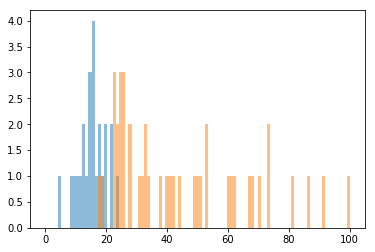

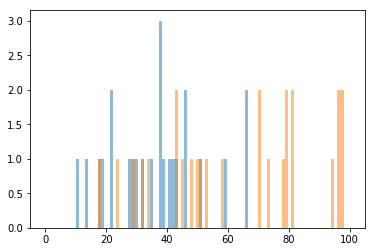

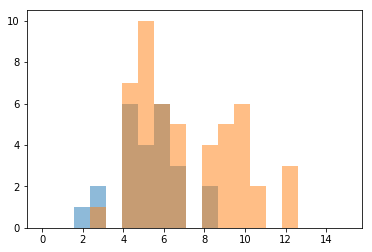

In [33]:
good_graphs = [name for name in graph_name_to_attributes.keys() if name in data["graph_name"].unique()]
bad_graphs = [name for name in graph_name_to_attributes.keys() if name not in good_graphs]
print len(good_graphs), len(bad_graphs)

good_sizes = [graph_name_to_attributes[name]['size'] for name in good_graphs]
bad_sizes = [graph_name_to_attributes[name]['size'] for name in bad_graphs]
bins = np.linspace(0, 100, 100)
plt.hist(good_sizes, alpha=0.5, bins=bins)
plt.hist(bad_sizes, alpha=0.5, bins=bins)
plt.show()

good_edges = [graph_name_to_attributes[name]['size'] * graph_name_to_attributes[name]['mean_degree'] for name in good_graphs]
bad_edges = [graph_name_to_attributes[name]['size'] * graph_name_to_attributes[name]['mean_degree'] for name in bad_graphs]
bins = np.linspace(0, 100, 100)
plt.hist(good_edges, alpha=0.5, bins=bins)
plt.hist(bad_edges, alpha=0.5, bins=bins)
plt.show()

good_edges = [graph_name_to_attributes[name]['max_degree'] for name in good_graphs]
bad_edges = [graph_name_to_attributes[name]['max_degree'] for name in bad_graphs]
bins = np.linspace(0, 15, 20)
plt.hist(good_edges, alpha=0.5, bins=bins)
plt.hist(bad_edges, alpha=0.5, bins=bins)
plt.show()